# installing cfscrape

In [ ]:
!pip install -U cfscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Preparing for a li'l bit of scraping

In [ ]:
import requests
import bs4  # beautiful soup
# import cfscrape # needed this, as the site was protected 
import numpy as np
import pandas as pd
import pickle
import random

In [ ]:
%cd /content/drive/MyDrive/Dataset/chicken_breed_recognizer

/content/drive/MyDrive/Dataset/chicken_breed_recognizer


In [ ]:
url = "https://www.chickensandmore.com/chicken-breeds"
scraper = cfscrape.create_scraper()
web_page = bs4.BeautifulSoup(scraper.get(url).text, "lxml")

In [ ]:
headings = []
for heading in web_page.find_all('h3'): # all the chicken breed names were in h3 tag
    headings.append(heading.text.strip())

In [ ]:
len(headings)

106

In [ ]:
type(headings)

list

In [ ]:
headings

['Chicken Breeds',
 'In This Guide',
 'Ameraucana',
 'Ancona',
 'Andalusian',
 'Appenzeller',
 'Araucana',
 'Austra White',
 'Australorp',
 'Black Copper Marans',
 'Black Sex Link',
 'Brown Leghorn',
 'Campine',
 'Cherry Egger',
 'Cinnamon Queen',
 'Cream Legbar',
 'Easter Egger',
 'Golden Comet',
 'Hamburg',
 'ISA Brown',
 'Isbar',
 'Jaerhon',
 'Langshan',
 'Olive Egger',
 'Plymouth Rock',
 'Red Sex Link',
 'Swedish Black Hen',
 'Swedish Flower Hens',
 'White Leghorn',
 'White Rock',
 'Whiting True Blue',
 'Altsteirer',
 'Barnevelder',
 'Basque',
 'Blue Laced Red Wyandotte',
 'Brahma',
 'Breda',
 'Buckeye',
 'Buff Orpington',
 'Catalana',
 'Chantecler',
 'Columbian Wyandotte',
 'Cuckoo Marans',
 'Delaware',
 'Derbyshire Redcap',
 'Dominique',
 'Dorking',
 'Faverolles',
 'Golden Laced Wyandotte',
 'Icelandic',
 'Iowa Blue',
 'Java',
 'Jersey Giant',
 'Lavender Orpington',
 'Light Brahma',
 'Marsh Daisy',
 'Minorca',
 'New Hampshire',
 'Orpingtons',
 'Red Ranger',
 'Rhode Island Red',
 

>> so we actually don't need few things, first we don't need the first thing, I mean the first element. And few last elements. However, there still remains a lot of chicken breeds. Should we take names randomly!! Perhaps

# Creating our chicken list

Let's take names randomly

In [ ]:
chicken_list = []
rand_idx = random.sample(range(1, 100), 20)    # we'll be taking 20 categories, that's what 20 in the random.sample() function

# another way of doing the same thing
# rng = np.random.default_rng()
# rand_idx = rng.choice(np.arange(1, 100), 20, replace=False)

for i in rand_idx:
    chicken_list.append(headings[i])

In [ ]:
chicken_list    # wooho, we have our chicken list, randomly taken

['Polish',
 'Frizzle',
 'Jersey Giant',
 'Shamo',
 'Cochin',
 'Cream Legbar',
 'Black Sex Link',
 'Austra White',
 'Blue Laced Red Wyandotte',
 'Cherry Egger',
 'Iowa Blue',
 'Easter Egger',
 'Nankin',
 'Bresse',
 'Silkie',
 'New Hampshire',
 'Orpingtons',
 'Turken (Naked Neck)',
 'Silver Laced Wyandotte',
 'Cornish Cross']

In [ ]:
chicken_list = sorted(chicken_list)
chicken_list

['Austra White',
 'Black Sex Link',
 'Blue Laced Red Wyandotte',
 'Bresse',
 'Cherry Egger',
 'Cochin',
 'Cornish Cross',
 'Cream Legbar',
 'Easter Egger',
 'Frizzle',
 'Iowa Blue',
 'Jersey Giant',
 'Nankin',
 'New Hampshire',
 'Orpingtons',
 'Polish',
 'Shamo',
 'Silkie',
 'Silver Laced Wyandotte',
 'Turken (Naked Neck)']

In [ ]:
with open("chicken_breeds", "wb") as fp:
    pickle.dump(chicken_list, fp)

# Setting up for the actual work

In [ ]:
%reload_ext autoreload
%autoreload
%matplotlib inline
bs = 8 # batchsize

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
# load the pickle file 
with open("chicken_breeds", "rb") as fp:
    chicken_list = pickle.load(fp)

In [ ]:
chicken_list

['Austra White',
 'Black Sex Link',
 'Blue Laced Red Wyandotte',
 'Bresse',
 'Cherry Egger',
 'Cochin',
 'Cornish Cross',
 'Cream Legbar',
 'Easter Egger',
 'Frizzle',
 'Iowa Blue',
 'Jersey Giant',
 'Nankin',
 'New Hampshire',
 'Orpingtons',
 'Polish',
 'Shamo',
 'Silkie',
 'Silver Laced Wyandotte',
 'Turken (Naked Neck)']

In [ ]:
for idx, _ in enumerate(chicken_list):
    # print(chicken_list[idx])
    if 'chicken' not in chicken_list[idx]:
        chicken_list[idx] += ' chicken'
chicken_list


['Austra White chicken',
 'Black Sex Link chicken',
 'Blue Laced Red Wyandotte chicken',
 'Bresse chicken',
 'Cherry Egger chicken',
 'Cochin chicken',
 'Cornish Cross chicken',
 'Cream Legbar chicken',
 'Easter Egger chicken',
 'Frizzle chicken',
 'Iowa Blue chicken',
 'Jersey Giant chicken',
 'Nankin chicken',
 'New Hampshire chicken',
 'Orpingtons chicken',
 'Polish chicken',
 'Shamo chicken',
 'Silkie chicken',
 'Silver Laced Wyandotte chicken',
 'Turken (Naked Neck) chicken']

In [ ]:
images = search_images_ddg(chicken_list[0], max_images=200)
f"No of image => {len(images)} -- One Image Url => {images[0]}"

'No of image => 200 -- One Image Url => https://www.backyardchickens.com/content/type/61/id/6078086/width/350/height/700/flags/LL'

In [ ]:
dest = 'Austra White chicken.jpg'
download_url(images[1], dest, show_progress=False)

Path('Austra White chicken.jpg')

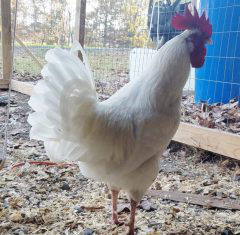

In [ ]:
image = Image.open(dest)
image.to_thumb(256, 256)

In [ ]:
data_path = "data"

In [ ]:
if not os.path.exists(data_path):
    os.mkdir(data_path)

for chicken_type in chicken_list:
    dest = os.path.join(data_path, chicken_type)
    if not os.path.exists(dest):
        os.mkdir(dest)
    
    try:
        chicken_images_url = search_images_ddg(chicken_type)
        download_images(dest, urls=chicken_images_url)
    except:
        continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#3913) [Path('data/Austra White chicken/eab33c1e-d795-4489-b711-88fe57449bdf.jpg'),Path('data/Austra White chicken/5bc31a41-5544-4657-af18-eb5590aba6b2.jpg'),Path('data/Austra White chicken/5c885fe8-f991-4628-8e0d-429b2421d615.jpg'),Path('data/Austra White chicken/79b18540-ac2d-4b29-b181-89e34b1990c2.jpg'),Path('data/Austra White chicken/fea6ccb1-cfc9-41c8-8dd8-351655fc4087.jpg'),Path('data/Austra White chicken/83ebc27b-72cf-4705-8c1b-c2ca4c8bb00a.JPG'),Path('data/Austra White chicken/5608fd97-5ff4-4ad0-93fd-49f54f569dda.jpg'),Path('data/Austra White chicken/8c7fcaf4-0e1e-4c6d-b1f8-4c93491a5130.jpg'),Path('data/Austra White chicken/6489e144-a30b-416c-bffd-c9dec9e7013e.jpg'),Path('data/Austra White chicken/01a8c60d-2796-40ae-9792-5c05ab97ba20.jpg')...]

In [ ]:
failed = verify_images(image_counts)
failed

(#50) [Path('data/Blue Laced Red Wyandotte chicken/a60fcb22-200c-4bbc-8c5e-aa02374161ec.jpg'),Path('data/Blue Laced Red Wyandotte chicken/9ae25874-67a1-440c-82a5-0b9ca6ceefaa.jpg'),Path('data/Blue Laced Red Wyandotte chicken/1acfafb0-6a0c-4572-a911-acfbf3b8f944.jpg'),Path('data/Blue Laced Red Wyandotte chicken/2b2f1991-bc71-4a4d-b618-ad5e078ee351.jpg'),Path('data/Bresse chicken/c2837b60-0eaa-4c40-a74d-ddd60b104a9b.jpg'),Path('data/Bresse chicken/669afead-023e-407b-a180-2116ccde9cf3.jpg'),Path('data/Bresse chicken/bd4beac0-f105-4b56-9817-02608a24c7be.jpg'),Path('data/Bresse chicken/0f247efe-497d-4ebc-8708-735461fc9b8a.jpg'),Path('data/Bresse chicken/4b5c3e26-a62d-4cc2-8cfd-795255a8af7c.jpg'),Path('data/Bresse chicken/830e1a3d-053d-4b6c-b1e1-65e1164904e3.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#50) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.15, seed=11),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [ ]:
doc(parent_label)

In [ ]:
dls = dblock.dataloaders(data_path, bs=bs)

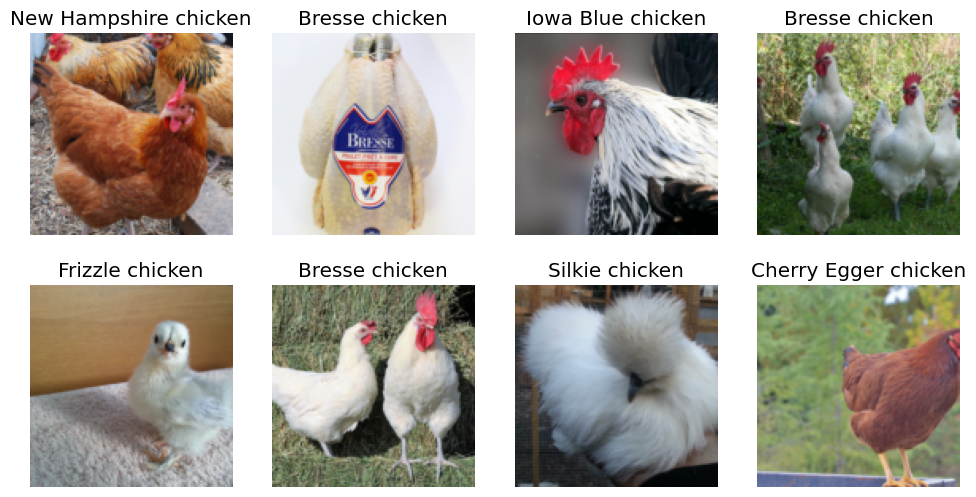

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

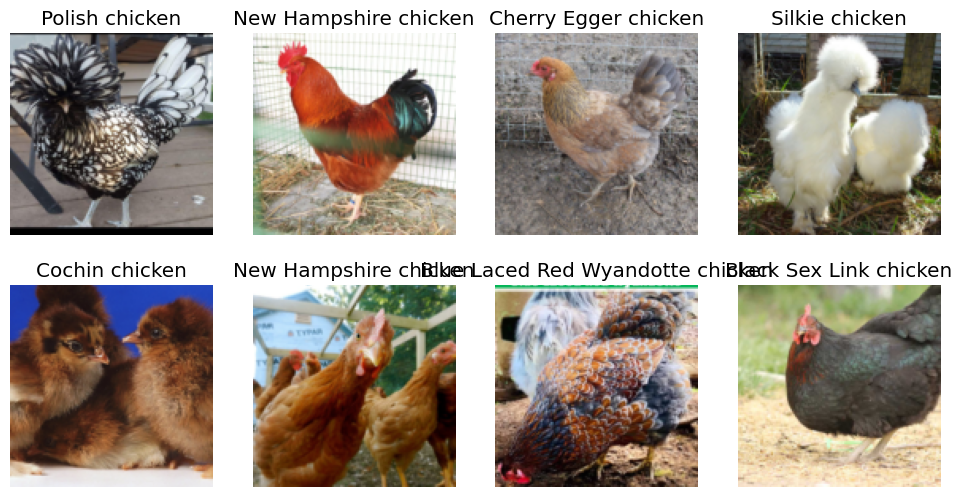

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

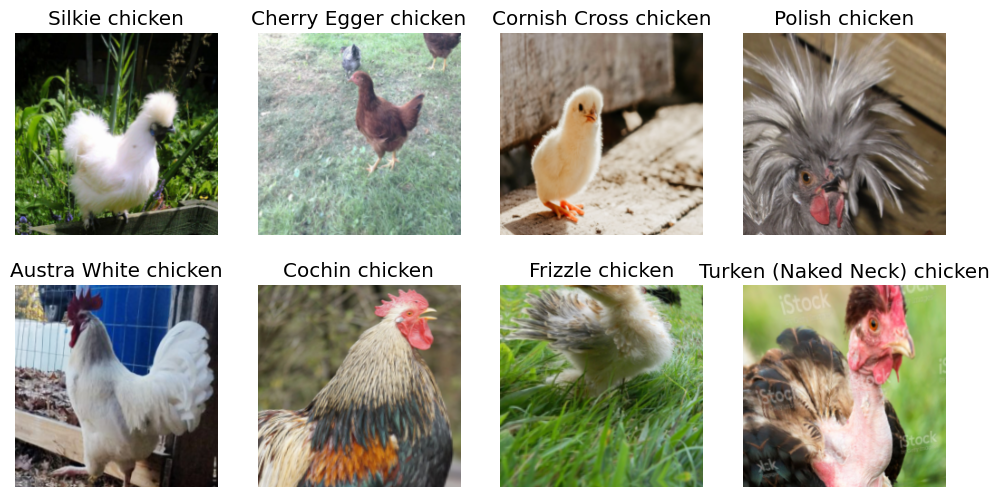

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms()) 
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, 'chicken_breeds_dataloader_v0.pkl')